### Dummy Classifier

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil
import sklearn
from sklearn import svm
from sklearn import preprocessing
import timeit

In [205]:
# get data in basic table form
df = pd.read_csv("./train_sample.csv")

In [206]:
df['time_to_attribution'] = df.apply(lambda row: datetime.strptime(row['attributed_time'], '%Y-%m-%d %H:%M:%S') - datetime.strptime(row['click_time'], '%Y-%m-%d %H:%M:%S') if isinstance(row['attributed_time'], str) else '', axis=1)

In [207]:
df['click_time_dt'] = df.apply(lambda row: (dateutil.parser.parse(row['click_time'], dayfirst=True) - datetime.utcfromtimestamp(0)).total_seconds() , axis=1)

ip = df.groupby('ip')['ip']
min_time = df.groupby('ip')["click_time_dt"].min()
max_time = df.groupby('ip')["click_time_dt"].max()
num_clicks = df.groupby('ip')["click_time_dt"].count()

freq = num_clicks / (max_time - min_time)
import math
f_list = []
for f in freq:
    if not math.isinf(f):
        f_list.append(f)
freq2 = sum(f_list)/len(f_list)
period = 1/freq2
arr = np.array([f_list])
stdev = np.std(arr)
outliers = arr[(arr - np.mean(arr)) > 2 * np.std(arr)]
np.max(arr)

2.0

In [210]:
from sklearn.utils import resample

majority_count = df['is_attributed'].value_counts()[0]

# Separate majority and minority classes
df_majority = df[df.is_attributed==0]
df_minority = df[df.is_attributed==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=majority_count,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_up = pd.concat([df_majority, df_minority_upsampled])

In [211]:
df_up

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,time_to_attribution,click_time_dt
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,,1.499765e+09
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,,1.499780e+09
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,,1.499796e+09
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0,,1.499749e+09
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0,,1.505120e+09
5,93663,3,1,17,115,2017-11-09 01:22:13,NaN,0,,1.505093e+09
6,17059,1,1,17,135,2017-11-09 01:17:58,NaN,0,,1.505093e+09
7,121505,9,1,25,442,2017-11-07 10:01:53,NaN,0,,1.499767e+09
8,192967,2,2,22,364,2017-11-08 09:35:17,NaN,0,,1.502444e+09
9,143636,3,1,19,135,2017-11-08 12:35:26,NaN,0,,1.502455e+09


In [215]:
def get_fv_labels(df):
    labels = df_up['is_attributed']
    fv = df_up.drop(['click_time', 'attributed_time', 'time_to_attribution','is_attributed'], axis=1)
    return fv, labels

def scale_fv(mat):
    min_max_scaler = preprocessing.MinMaxScaler()
    return np.transpose(min_max_scaler.fit_transform(np.transpose(mat)))
df_up = df_up.sample(frac=1)
df_train = df_up.head(119727)
df_test = df_up.tail(79818)

train_fv, train_labels = get_fv_labels(df_train)
test_fv, test_labels = get_fv_labels(df_test)

train_fv_np = train_fv.as_matrix()
test_fv_np = test_fv.as_matrix()

train_labels_np = train_labels.as_matrix()
test_labels_np = test_labels.as_matrix()

train_fv_np_sc = scale_fv(train_fv_np)
test_fv_np_sc = scale_fv(test_fv_np)

In [216]:
#probability of finding a 1 from lables
prob_1 = np.count_nonzero(train_labels_np)/len(train_labels)
prob_1

0.5

In [217]:
from sklearn.dummy import DummyClassifier

def dummy_classifier(fv, labels):
    clf = sklearn.dummy.DummyClassifier(strategy='stratified', random_state=None)
    clf.fit(fv, labels) 
    return clf

import time
start = time.time()

clf = dummy_classifier(train_fv_np_sc,train_labels_np) 

end = time.time()
print('time',end - start)

#print(timeit.timeit(svm(test_mat_scaled)))
predict = clf.predict(test_fv_np_sc)
labels = test_labels_np



accuracy=accuracy_score(predict,labels)

print('accuracy',accuracy)

print('predicts', np.unique(predict))




print('score',clf.score(test_fv_np_sc,labels))

print('predict',predict)
print('labels',labels)

print('sum',sum(labels))


incorrect = np.sum(np.bitwise_xor(predict,labels))


print('incorrect',incorrect)

print('incorrect_ratio',(incorrect/40000))

print('dummy_prediction_result',(1-(incorrect/40000)))



time 0.00716400146484375
accuracy 0.498391348360779
predicts [0 1]
score 0.499744419833021
predict [1 0 1 ... 0 0 1]
labels [0 0 1 ... 0 0 0]
sum 99773
incorrect 100094
incorrect_ratio 2.50235
dummy_prediction_result -1.5023499999999999


### Logistic Regression

In [218]:
def lr(fv, labels):
    # change solver to sag or saga for large dataset, and include max_iter = 100
    clf = sklearn.linear_model.LogisticRegression(penalty='l1', dual=False, tol=0.001, C=1, solver='liblinear')
    clf.fit(fv, labels) 
    return clf

import time
start = time.time()

clf = lr(train_fv_np_sc,train_labels_np) 

end = time.time()
print('time',end - start)

#print(timeit.timeit(svm(test_mat_scaled)))
predict = clf.predict(test_fv_np_sc)
labels = test_labels_np


accuracy=accuracy_score(predict,labels)

print('accuracy',accuracy)

print('predicts', np.unique(predict))


print('score',clf.score(test_fv_np_sc,labels))

print('predict',predict)
print('labels',labels)

print('sum',sum(labels))


incorrect = np.sum(np.bitwise_xor(predict,labels))


print('incorrect',incorrect)

print('incorrect_ratio',(incorrect/40000))

print('lr_prediction_result',(1-(incorrect/40000)))


time 1.4156408309936523
accuracy 0.7093001112525432
predicts [0 1]
score 0.7093001112525432
predict [0 0 0 ... 1 0 0]
labels [0 0 1 ... 0 0 0]
sum 99773
incorrect 58008
incorrect_ratio 1.4502
lr_prediction_result -0.45019999999999993


### Multiclass Decision Tree

In [219]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [220]:
#let's have a look at the data
#how many features do we have?
#how many categories within the features?
#can we get use this info to get a Gini score and start the CART tree?
print('There are', len(df["ip"].unique()), 'unique IPs.')
print('There are', len(df["app"].unique()), 'unique Apps.')
print('There are', len(df["device"].unique()), 'unique Devices.')
print('There are', len(df["os"].unique()), 'unique OSs.')
print('There are', len(df["channel"].unique()), 'unique Channels.')

There are 34857 unique IPs.
There are 161 unique Apps.
There are 100 unique Devices.
There are 130 unique OSs.
There are 161 unique Channels.


In [223]:
def dtc(fv, labels):
    # change solver to sag or saga for large dataset, and include max_iter = 100
    clf = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
    clf.fit(fv, labels) 
    return clf

import time
start = time.time()

clf = dtc(train_fv_np_sc,train_labels_np) 

end = time.time()
print('time',end - start)

#print(timeit.timeit(svm(test_mat_scaled)))
predict = clf.predict(test_fv_np_sc)
labels = test_labels_np


accuracy=accuracy_score(predict,labels)

print('accuracy',accuracy)

print('predicts', np.unique(predict))


print('score',clf.score(test_fv_np_sc,labels))

print('predict',predict)
print('labels',labels)

print('sum',sum(labels))


incorrect = np.sum(np.bitwise_xor(predict,labels))


print('incorrect',incorrect)

print('incorrect_ratio',(incorrect/40000))

print('dtc_prediction_result',(1-(incorrect/40000)))

time 0.2174241542816162
accuracy 0.5979673859661432
predicts [0 1]
score 0.5979673859661432
predict [0 0 0 ... 0 0 0]
labels [0 0 1 ... 0 0 0]
sum 99773
incorrect 80224
incorrect_ratio 2.0056
dtc_prediction_result -1.0055999999999998


In [224]:
from sklearn.ensemble import RandomForestClassifier

def rfc(fv, labels):
    clf = RandomForestClassifier(n_estimators = 100)
    clf.fit(fv, labels) 
    return clf

import time
start = time.time()

clf = rfc(train_fv_np_sc,train_labels_np) 

end = time.time()
print('time',end - start)

#print(timeit.timeit(svm(test_mat_scaled)))
predict = clf.predict(test_fv_np_sc)
labels = test_labels_np


accuracy=accuracy_score(predict,labels)

print('accuracy',accuracy)

print('predicts', np.unique(predict))

print('score',clf.score(test_fv_np_sc,labels))

print('predict',predict)
print('labels',labels)

print('sum',sum(labels))


incorrect = np.sum(np.bitwise_xor(predict,labels))

print('incorrect',incorrect)

print('incorrect_ratio',(incorrect/40000))

print('rfc_prediction_result',(1-(incorrect/40000)))

time 4.246610879898071
accuracy 0.6672145770899943
predicts [0 1]
score 0.6672145770899943
predict [0 0 0 ... 0 0 0]
labels [0 0 1 ... 0 0 0]
sum 99773
incorrect 66406
incorrect_ratio 1.66015
rfc_prediction_result -0.66015


In [225]:
%matplotlib inline
import seaborn as sns
import sklearn.cross_validation
from matplotlib import pyplot as plt
import scipy as sp

In [226]:
df_rel = df[['ip', 'app','device','os','channel']]

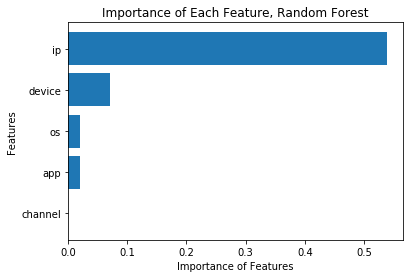

In [227]:
clf_rfc = RandomForestClassifier(n_estimators = 100)
clf_rfc.fit(train_fv_np_sc,train_labels_np)
imp = clf_rfc.feature_importances_
names = df_rel.columns
imp,names = zip(*sorted(zip(imp,names)))

plt.barh(range(len(names)),imp,align='center')
plt.yticks(range(len(names)),names)

plt.xlabel('Importance of Features')
plt.ylabel('Features')
plt.title('Importance of Each Feature, Random Forest')
plt.show()

